# Doctor's Consultation Fees Prediction
Problem Statement:
Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.



Use the link below to download the dataset. 

In [754]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

In [755]:
#loading data 
df=pd.read_excel("Final_Train.xlsx")
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [756]:
df.tail(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5951,"BDS, certification in smile designing",4 years experience,NaN,"HAL, Bangalore",Dentist,Dental Restoration Restoration Aesthetics Disc...,200
5952,MBBS,47 years experience,NaN,"Bhandup West, Mumbai",General Medicine,NaN,100
5953,"MD - Homeopathy, Post Graduate Diploma in Heal...",35 years experience,92%,"Malleswaram, Bangalore",Homeopath,"92% 168 Feedback Malleswaram, Bangalore",100
5954,BHMS,31 years experience,NaN,"Adarsh Nagar, Delhi",Homeopath,NaN,300
5955,MD - Homeopathy,10 years experience,NaN,"Vijaynagar, Delhi",Homeopath,NaN,300
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [757]:
#in the qualification section there are uneven qualification. like bds mbbs md
#many doctors has many different degrees
#in the location section, it is divided into two parts 2)city 1) area in that city
#the miscellaneous_info is giving data about reviews, number of feedbacks and locality


In [758]:
#checking shape
df.shape

(5961, 7)

In [759]:
#there are 5961 rows and 7 columns

In [760]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [761]:
# There are only one int columns(fees) rest are object

In [762]:
#checking for null values

In [763]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

<AxesSubplot:>

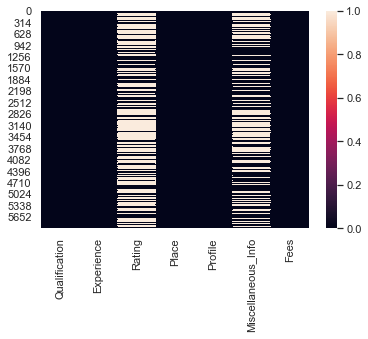

In [764]:
sns.heatmap(df.isnull())

In [765]:
#there are 3302 null values in rating which is 55 percent of the data
#there are 2620 null values in miscellaneous_Info which is 43 percent of the data

In [766]:
#spliting location variable in two parts area and city
df['Area'] = df['Place'].str.split(', ').str[0]
df['City'] = df['Place'].str.split(', ').str[-1]

In [767]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [768]:
#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

Qualification         1420
Experience              64
Rating                  52
Place                  878
Profile                  6
Miscellaneous_Info    2999
Fees                    40
Area                   867
City                    10
dtype: int64

In [769]:
#checking for unique values in are and city
df["City"].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: City, dtype: int64

In [770]:
#there are 9 different cites, however the city e is undefined and has 1 value in it
#droping e with indexing method because there are others variables also ontaing letter e


In [771]:
#finding index
e = df[df['City'] == 'e'].index
e

Int64Index([3980], dtype='int64')

In [772]:
#droping row e
df = df.drop([3980])

In [773]:
#checking for unique values in are and Area
df["City"].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: City, dtype: int64

In [774]:
#checking for area
df["Area"].value_counts()

HSR Layout                  75
Andheri West                70
Dwarka                      68
Banjara Hills               64
Mulund West                 54
Borivali West               52
Kandivali West              50
Indiranagar                 48
Whitefield                  47
Malad West                  47
Malleswaram                 47
Pitampura                   45
Vileparle West              43
Andheri East                43
Powai                       42
Jubilee Hills               40
Bannerghatta Road           39
Marathahalli                39
Kondapur                    38
Ghatkopar East              38
Bandra West                 38
Secunderabad                37
Rohini                      37
Adyar                       37
Janak Puri                  37
Paschim Vihar               36
Shalimar Bagh               36
KPHB                        35
Koramangala                 35
R.S. Puram                  34
Kukatpally                  34
Old Rajendra Nagar          34
Madhapur

In [775]:
#there are 866 different localities 

In [776]:
#coverting experiance column into int 
df["Experience"]=[x[:2] for x in df["Experience"]]
df["Experience"]=df["Experience"].astype(int)


In [777]:
def exper(x):
    if x<=33:#33 because the max experience is 66
        return 1 #for meaningful magnitude
    if x>33:
        return 2

In [778]:
df['Experience']=df['Experience'].apply(exper)

In [779]:
#converting rating column
df["Rating"].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
83%      21
86%      21
80%      19
77%      16
87%      14
79%      13
84%      13
67%      12
81%      12
76%       9
71%       9
75%       8
73%       8
74%       7
60%       7
78%       6
56%       5
68%       5
70%       4
69%       4
57%       3
72%       3
55%       2
62%       2
33%       2
63%       2
64%       2
48%       1
7%        1
40%       1
45%       1
53%       1
47%       1
58%       1
36%       1
65%       1
Name: Rating, dtype: int64

In [780]:
#as there is no decimal values we will convert rating into int variable and replace the nanv values
#to not effect th emodel with nan values we will be replacing it with 0
df['Rating'].fillna('0%',inplace = True)
df['Rating'] = df['Rating'].str[0:-1].astype(int)


In [781]:
def crat(x):
    if x<=50: #50 because of max rating is 100
        return 1 #because of the meaningful magnitude
    if x>50:
        return 2

In [782]:
df['Rating']=df['Rating'].apply(crat)

In [783]:
# Extract relevant qualification
# DICT of qualification with there counts
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            



In [784]:
#Extract top 10 qual
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [785]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    df[qual] = 0

for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df[c][y] = 1

In [786]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",1,2,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",1,2,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",1,1,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",1,1,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],1,2,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [787]:
#droping the data
df.drop(["Qualification","Place","Miscellaneous_Info","Area"], axis=1,inplace=True)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Homeopath'),
  Text(1, 0, 'Ayurveda'),
  Text(2, 0, 'ENT Specialist'),
  Text(3, 0, 'Dentist'),
  Text(4, 0, 'General Medicine'),
  Text(5, 0, 'Dermatologists')])

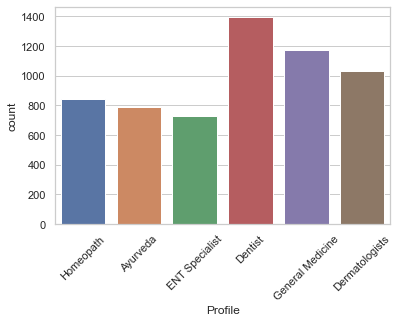

In [788]:
#profile
sns.countplot("Profile", data=df)
plt.xticks(rotation=45)

In [789]:
#the dentist are highest in numbers and ent specialist are the least in numbers

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Ernakulam'),
  Text(1, 0, 'Bangalore'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Hyderabad'),
  Text(5, 0, 'Coimbatore'),
  Text(6, 0, 'Mumbai'),
  Text(7, 0, 'Thiruvananthapuram')])

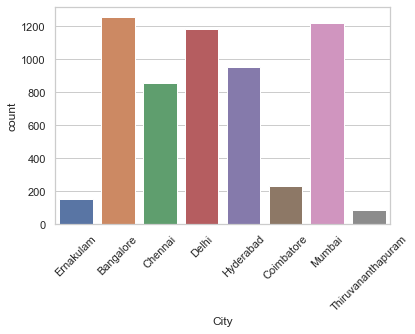

In [790]:
#city
sns.countplot("City", data=df)
plt.xticks(rotation=45)

In [791]:
#in the city Banglore,delhi,hyderabad, mumbai contains majority of the doctors

In [792]:
#craeting a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(10,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

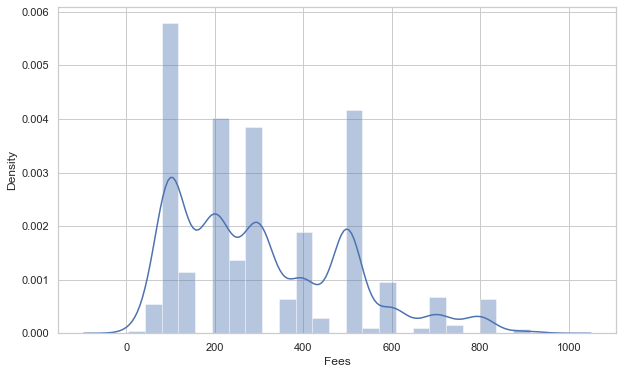

In [793]:
histogram(df,"Fees")

In [794]:
#most of the doctors charges 100 ruppes as their fees nad the maximum fee is around 950 

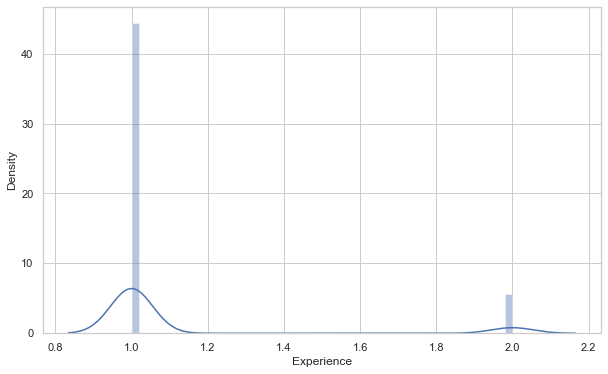

In [795]:
#experiance
histogram(df,"Experience")

In [796]:
#most of the doctors has experiance less than 33 years. only a handful of doctors has more than 33 years experiance

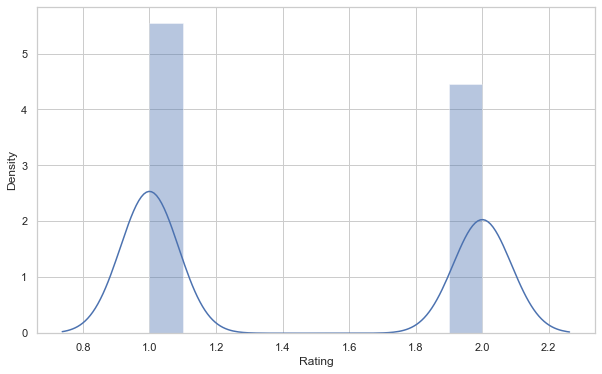

In [797]:
#rating
histogram(df,"Rating")

In [798]:
#most of the doctors has rating below 50

In [799]:
#creating barplot function with y axis as fees
def barplot(variable):
    plt.xticks(rotation=90)
   
    sns.barplot(x=variable, y="Fees", data=df)

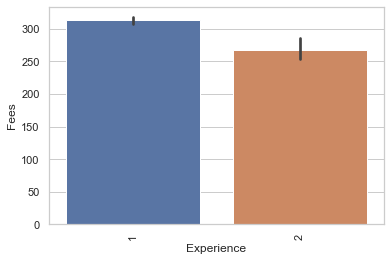

In [800]:
#experiance/fees

barplot("Experience")

In [801]:
#few doctors with less experiance has more fees

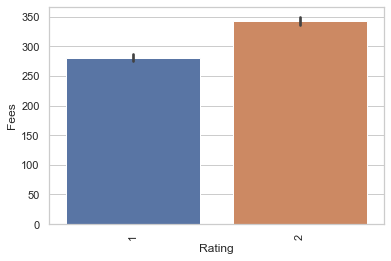

In [802]:
#rating/fees

barplot("Rating")

In [803]:
#doctros with more ratings has more fees

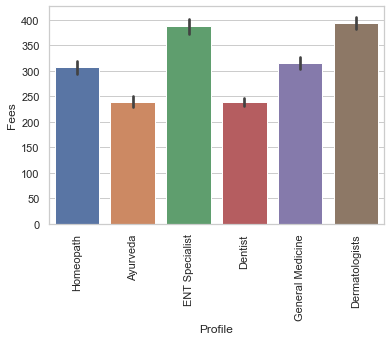

In [804]:
#profile
barplot("Profile")

In [805]:
#dermatologist and ent specialist charges the more fees while ayurvediccdoctors charges very less fees

In [806]:
df = pd.get_dummies(df,columns=['City','Profile'], prefix=['City','Profile'])

In [807]:
#cheking skewness
df_new.skew()

Experience                              2.583352
Rating                                  0.180807
Fees                                    0.700628
MBBS                                    0.516842
BDS                                     1.013563
BAMS                                    1.759315
BHMS                                    2.122139
MD - Dermatology                        3.285446
MS - ENT                                0.000000
Venereology & Leprosy                   0.000000
MD - General Medicine                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
MD - Homeopathy                         0.000000
City_Bangalore                          1.249158
City_Chennai                            1.948914
City_Coimbatore                         0.000000
City_Delhi                              1.418576
City_Ernakulam                          0.000000
City_Hyderabad                          1.757079
City_Mumbai                             1.302924
City_Thiruvananthapu

In [808]:
#spliting the data in x and y
x=df_new.drop("Fees", axis=1)
x.head(10)

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
1,1,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,2,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
13,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [809]:
y=df_new["Fees"]
y.head(10)

1     350
2     300
3     250
4     250
5     100
6     200
7     200
10    700
11    100
13    350
Name: Fees, dtype: int64

In [810]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x= stdsc.fit_transform(x)

In [811]:
#importing libraries
from sklearn.model_selection import train_test_split
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import  r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [812]:
#spliting train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=56)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3377, 26), (3377,), (845, 26), (845,))

In [813]:
#creating function 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    
    print('MSE:', metrics.mean_squared_error(y_test, pred))
    print('RMSLE:', sqrt(mean_squared_log_error(y_test, pred)))
    
    
    print("""r2 score is:""",r2_score(y_test,pred))
    
    print("cross_val_score",cross_val_score(model,x,y,cv=5).mean())
    

In [814]:
#DecisionTreeClassifier
model(DecisionTreeRegressor)

MSE: 39312.004947423215
RMSLE: 0.724632025046459
r2 score is: -0.0679647097763898
cross_val_score -0.013282115734765986


In [815]:
#LinearRegression
model(LinearRegression)

MSE: 31965.497475900964
RMSLE: 0.6752912890446519
r2 score is: 0.13161327486691465
cross_val_score 0.1387388889044152


In [816]:
#RandomForestRegressor
model(RandomForestRegressor)

MSE: 35658.32134897471
RMSLE: 0.6929620020650763
r2 score is: 0.03129263283563022
cross_val_score 0.058593811175650566


In [817]:
#ExtraTreesRegressor
model(ExtraTreesRegressor)

MSE: 39274.26938028039
RMSLE: 0.7247179980736619
r2 score is: -0.06693957116883653
cross_val_score -0.00844122523823978


In [818]:
#KNeighborsRegressor
model(KNeighborsRegressor)

MSE: 40744.73372781065
RMSLE: 0.7129952270384902
r2 score is: -0.10688675860552355
cross_val_score -0.021896426550731984


In [819]:
#SVR
model(SVR)

MSE: 34516.04515171072
RMSLE: 0.6678824982686181
r2 score is: 0.06232413756623478
cross_val_score 0.05706718168695089


In [820]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [821]:
#BaggingRegressor
model(BaggingRegressor)

MSE: 35916.98448245765
RMSLE: 0.6941369924246181
r2 score is: 0.024265692880534595
cross_val_score 0.03905720149126572


In [822]:
#AdaBoostRegressor
model(AdaBoostRegressor)

MSE: 33042.75343961468
RMSLE: 0.7161661404488294
r2 score is: 0.1023481342519531
cross_val_score 0.08238242782207476


In [823]:
#GradientBoostingRegressor
model(GradientBoostingRegressor)

MSE: 32401.48036157535
RMSLE: 0.6755862242057024
r2 score is: 0.11976919984226386
cross_val_score 0.13160198068254253


In [824]:
#decisionTreeClassifier is the best model as the RMSLE is maxium
#setting parameters for hyperparameter tunning
parameter={"max_depth":np.arange(2,10),
          "criterion":["mse","mae",'friedman_mse','poisson'],
          'min_samples_leaf': [3, 4, 5],
          'min_samples_split': [8, 10, 12],
            }

In [825]:
#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [826]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse', 'poisson'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]})

In [827]:
#checking best parameters
gcv.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 12}

In [828]:
model=DecisionTreeRegressor(criterion="mse",max_depth=6,min_samples_leaf=5,min_samples_split=12)
model.fit(x_train,y_train)
pred=model.predict(x_test)
    
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSLE:', sqrt(mean_squared_log_error(y_test, pred)))       
print("""r2 score is:""",r2_score(y_test,pred))
    

MSE: 34328.67946763774
RMSLE: 0.6844624112956649
r2 score is: 0.06741418419908074


In [829]:
#savingThemodel
import joblib
joblib.dump(model,"Doctor_Fees.pkl")

['Doctor_Fees.pkl']

In [830]:
#testing the data
#loading data 
df=pd.read_excel("Final_Test.xlsx")
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
5,"BDS, MDS",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore"
7,"BDS, MDS - Pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11 years experience,99%,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore"
9,BHMS,44 years experience,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN


In [831]:
df.tail(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
1977,"MBBS, MS - General Surgery, FAIS, FIAGES",28 years experience,NaN,"Panchsheel Park, Delhi",General Medicine,"Panchsheel Park, Delhi ₹1,000 Available Tomorrow"
1978,"BDS, MDS - Endodontics",15 years experience,NaN,"Prabhadevi, Mumbai",Dentist,"Prabhadevi, Mumbai ₹1,000 Visits On-Call"
1979,"BDS, MDS - Oral & Maxillofacial Surgery",17 years experience,100%,"Powai, Mumbai",Dentist,General Dentistry Dental Fillings RCT - Single...
1980,"MDS - Pedodontics, BDS",18 years experience,98%,"Velachery, Chennai",Dentist,"98% 240 Feedback Velachery, Chennai"
1981,"MBBS, MD - Dermatology , Venereology & Leprosy...",8 years experience,NaN,"Lajpat Nagar III, Delhi",Dermatologists,NaN
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8 years experience,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500"


In [832]:
#checking shape
df.shape

(1987, 6)

In [833]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [834]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

<AxesSubplot:>

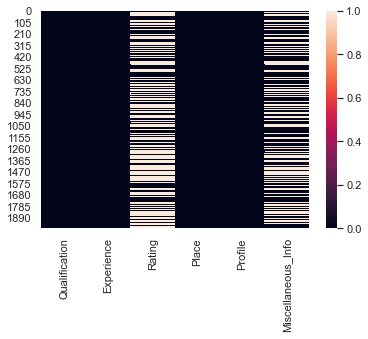

In [835]:
sns.heatmap(df.isnull())

In [836]:
#spliting location variable in two parts area and city
df['Area'] = df['Place'].str.split(', ').str[0]
df['City'] = df['Place'].str.split(', ').str[-1]

In [837]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Area,City
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,West Marredpally,Hyderabad
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore


In [838]:
#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

Qualification          630
Experience              57
Rating                  37
Place                  593
Profile                  6
Miscellaneous_Info    1085
Area                   590
City                     9
dtype: int64

In [839]:
#checking for unique values in are and city
df["City"].value_counts()

Bangalore             420
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: City, dtype: int64

In [840]:
#coverting experiance column into int 
df["Experience"]=[x[:2] for x in df["Experience"]]
df["Experience"]=df["Experience"].astype(int)


In [841]:
def exper(x):
    if x<=33:#33 because the max experience is 66
        return 1 #for meaningful magnitude
    if x>33:
        return 2

In [842]:
df['Experience']=df['Experience'].apply(exper)

In [843]:
#converting rating column
df["Rating"].value_counts()

100%    223
98%     112
97%      84
99%      68
96%      65
94%      51
95%      47
93%      34
90%      29
92%      29
91%      26
88%      13
87%      11
83%      11
89%      11
82%       9
85%       8
71%       7
84%       7
80%       7
86%       6
67%       5
73%       5
76%       4
70%       4
60%       4
81%       3
55%       3
69%       2
79%       2
64%       2
53%       1
52%       1
77%       1
78%       1
65%       1
Name: Rating, dtype: int64

In [844]:
#as there is no decimal values we will convert rating into int variable and replace the nanv values
#to not effect th emodel with nan values we will be replacing it with 0
df['Rating'].fillna('0%',inplace = True)
df['Rating'] = df['Rating'].str[0:-1].astype(int)


In [845]:
def crat(x):
    if x<=50: #50 because of max rating is 100
        return 1 #because of the meaningful magnitude
    if x>50:
        return 2

In [846]:
# Extract relevant qualification
# DICT of qualification with there counts
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1


In [847]:
#Extract top 10 qual
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [848]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    df[qual] = 0

for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df[c][y] = 1

In [849]:
df.drop(["Qualification","Place","Miscellaneous_Info","Area"], axis=1,inplace=True)

In [850]:
df = pd.get_dummies(df,columns=['City','Profile'], prefix=['City','Profile'])

In [851]:
df.head()

,Experience,Rating,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,...,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,70,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [852]:
stdsc = StandardScaler()
x= stdsc.fit_transform(df)

In [853]:
#prediction
predicted=model.predict(x)
print(predicted)

[284.36018957 409.1954023  423.87387387 ... 284.36018957 240.83665339
 300.        ]
